# Notebook for plotting annual and seasonal max hail

### Import necessary libraries

In [1]:
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

## Open WRF HIST seasonal and daily max files (resampled to convective daily max; 12Z - 12Z)

In [2]:
hist = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/hist_daily_max_hail_inches.nc')
mid4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_4p5_daily_max_hail_inches.nc')
mid8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/mid_century_8p5_daily_max_hail_inches.nc')
end4p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_4p5_daily_max_hail_inches.nc')
end8p5 = xr.open_dataset('/home/scratch/jgoodin/convective_daily_max_resamples/end_century_8p5_daily_max_hail_inches.nc')

In [3]:
hist

<xarray.Dataset>
Dimensions:     (Time: 5479, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 1990-09-30T12:00:00 ... 2005-09-29T12:0...
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 ...

## Convert daily data to inches and select only values that meet sev criteria

In [4]:
hist_inches = hist * 39.3701 
mid4p5_inches = mid4p5 * 39.3701
mid8p5_inches = mid8p5 * 39.3701 #Convert to in
end4p5_inches = end4p5 * 39.3701
end8p5_inches = end8p5 * 39.3701

In [5]:
end8p5_inches.HAIL_MAX2D.max() #Ensure units are in inches

<xarray.DataArray 'HAIL_MAX2D' ()>
array(2.39091444)

## Specify only values of ≥ 1 in

In [6]:
hist_sev = hist_inches.where(hist_inches >= 1)
mid4p5_sev = mid4p5_inches.where(mid4p5_inches >= 1)
mid8p5_sev = mid8p5_inches.where(mid8p5_inches >= 1)
end4p5_sev = end4p5_inches.where(end4p5_inches >= 1)
end8p5_sev = end8p5_inches.where(end8p5_inches >= 1)

## Groupby year and find max along 'Time' dimension and then sum along 'year'. Then find mean annual statistic by dividing by 15

In [7]:
hist_annual = hist_sev.groupby('Time.year').max(dim = 'Time').sum(dim = 'year')
mid4p5_annual = mid4p5_sev.groupby('Time.year').max(dim = 'Time').sum(dim = 'year')
mid8p5_annual = mid8p5_sev.groupby('Time.year').max(dim = 'Time').sum(dim = 'year')
end4p5_annual = end4p5_sev.groupby('Time.year').max(dim = 'Time').sum(dim = 'year')
end8p5_annual = end8p5_sev.groupby('Time.year').max(dim = 'Time').sum(dim = 'year')

In [8]:
hist_annual.HAIL_MAX2D.max()

<xarray.DataArray 'HAIL_MAX2D' ()>
array(29.33736992)

## Divide by 15 to find annual statistic

In [9]:
hist_annual_stat = hist_annual / 15 #Divide annual by 15 to find mean annual HAIL_MAX2D values
mid4p5_annual_stat =  mid4p5_annual / 15
mid8p5_annual_stat = mid8p5_annual / 15
end4p5_annual_stat = end4p5_annual / 15
end8p5_annual_stat = end8p5_annual / 15

In [10]:
end8p5_annual_stat.HAIL_MAX2D.max()

<xarray.DataArray 'HAIL_MAX2D' ()>
array(2.01225805)

### Select HAIL_MAX2D variable to create plottable 2D array

In [11]:
hist_plot = hist_annual_stat.HAIL_MAX2D
mid4p5_plot = mid4p5_annual_stat.HAIL_MAX2D #Select variable from each season for 2D plotting
mid8p5_plot = mid8p5_annual_stat.HAIL_MAX2D #**These are plotting variables**
end4p5_plot = end4p5_annual_stat.HAIL_MAX2D
end8p5_plot = end8p5_annual_stat.HAIL_MAX2D

## Import file containing WRF lat/lon coords

In [12]:
coords = xr.open_dataset('lat_lon.nc') #Open .nc file containing WRF lat/lon coords

### Assign lat/lon coords to variables

In [13]:
lats = coords.CLAT.values[0, :, :]
lons = coords.CLONG.values[0, :, :]

### Create rectangles of US subregions to plot on annual map

In [15]:
"""
coord = [[266, 38], [280, 38], [280, 45], [266, 45]]
coord.append(coord[0])
xs_midwest, ys_midwest = zip(*coord)

coord1 = [[266, 31], [278, 31], [278, 37], [266, 37]]
coord1.append(coord1[0])
xs_south, ys_south = zip(*coord1)

coord2 = [[251, 40], [265, 40], [265, 48.5], [251, 48.5]]
coord2.append(coord2[0])
xs_upper_plains, ys_upper_plains = zip(*coord2)

coord3 = [[255, 31], [265, 31], [265, 39], [255, 39]]
coord3.append(coord3[0])
xs_lower_plains, ys_lower_plains = zip(*coord3)
"""

# Plot on map of CONUS

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


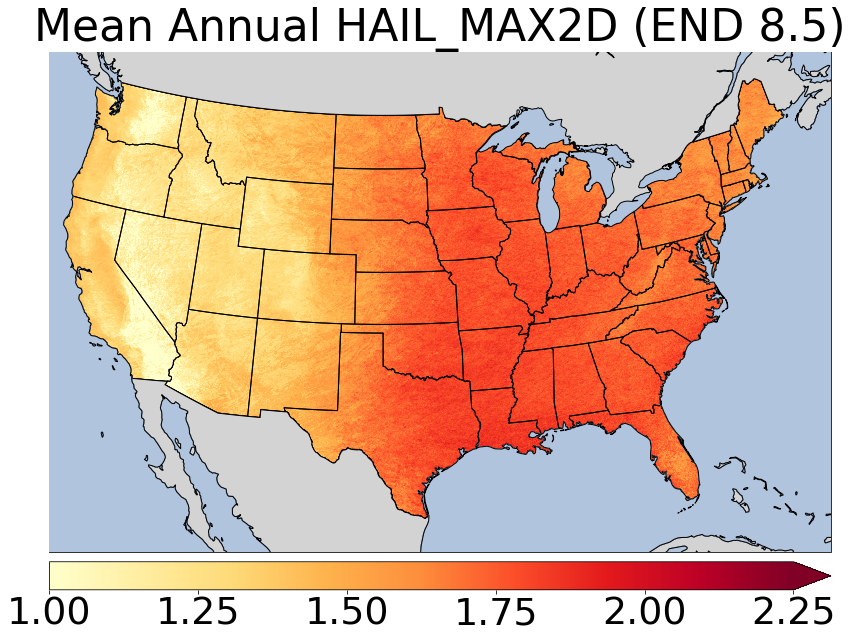

In [17]:
fig = plt.figure(figsize= (14,10)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries

#plt.plot(xs_midwest, ys_midwest, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 4, zorder = 15)
#plt.plot(xs_south, ys_south, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 4, zorder = 15)
#plt.plot(xs_upper_plains, ys_upper_plains, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 4, zorder = 15)
#plt.plot(xs_lower_plains, ys_lower_plains, transform=cartopy.crs.PlateCarree(), color = 'black', linewidth = 4, zorder = 15)

lrFig = ax.pcolormesh(lons, lats, end8p5_plot, vmin = 1, vmax = 2.25, cmap = 'YlOrRd', transform = ccrs.PlateCarree())
#gls = ax.gridlines(draw_labels=True, dms = True, x_inline=False, y_inline=False, color="black", linestyle="dotted", zorder = 10)
#gls.top_labels=False
#gls.right_labels=False
#gls.xlabel_style = {'size': 28, 'rotation': 0}
#gls.xpadding = 18.0
#gls.ylabel_style = {'size': 28}
plt.title("Mean Annual HAIL_MAX2D (END 8.5)", fontsize = 44)
ax1 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax1, ticks = [1, 1.25, 1.5, 1.75, 2, 2.25], orientation = 'horizontal', extend = 'max')
#cb.set_label('Days', fontsize = 30)
cb.ax.tick_params(labelsize = 38)
plt.subplots_adjust(bottom=0.02)
plt.savefig('/home/scratch/jgoodin/wrf_end8p5_mean_annual_hailsize_real.png')

# Find delta annual hail size for WRF HIST and each FUTR scenario

In [25]:
mid4p5_delta = mid4p5_plot - hist_plot
mid8p5_delta = mid8p5_plot - hist_plot
end4p5_delta = end4p5_plot - hist_plot
end8p5_delta = end8p5_plot - hist_plot

## Plot of map of CONUS

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


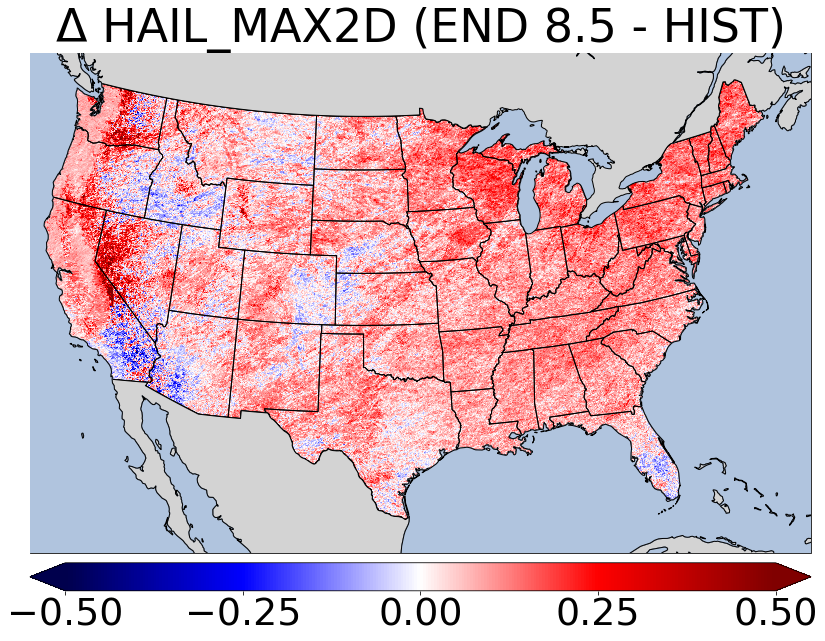

In [35]:
fig = plt.figure(figsize= (14,10)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries
lrFig = ax.pcolormesh(lons, lats, end8p5_delta, vmin = -0.5, vmax = 0.5, cmap = 'seismic', transform = ccrs.PlateCarree())
plt.title("Δ HAIL_MAX2D (END 8.5 - HIST)", fontsize = 46)
ax1 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax1, ticks = [-0.5, -0.25, 0, 0.25, 0.5], orientation = 'horizontal', extend = 'both')
#cb.set_label('Days', fontsize = 30)
cb.ax.tick_params(labelsize = 38)
plt.subplots_adjust(bottom=0.02)
plt.savefig('/home/scratch/jgoodin/wrf_end8p5_mean_annual_hailsize_delta.png')

## Find percent differences for plotting results of Mann-Whitney

### Calculate absolute value for numerator

In [14]:
abs_value_mid4p5 = mid4p5_plot - hist_plot
abs_value_mid8p5 = mid8p5_plot - hist_plot
abs_value_end4p5 = end4p5_plot - hist_plot
abs_value_end8p5 = end8p5_plot - hist_plot

### Calculate percent difference

In [15]:
mid4p5_percent = ((abs_value_mid4p5 / (mid4p5_plot + hist_plot) / 2)) * 100
mid8p5_percent = ((abs_value_mid8p5 / (mid8p5_plot + hist_plot) / 2)) * 100 #Calculate percent difference between WRF HIST and FUTR
end4p5_percent = ((abs_value_end4p5 / (end4p5_plot + hist_plot) / 2)) * 100 
end8p5_percent = ((abs_value_end8p5 / (end8p5_plot + hist_plot) / 2)) * 100

## Read in numpy array containing results of Mann-Whitney U-test for statistical significance (with false discovery rate of alpha = 0.1)

### Results from Mann-Whitney will be hatched over plot of % difference

In [17]:
utest = np.load('/home/scratch/jgoodin/fdr_delta_hist_end8p5_sev_hail_size.npy')

In [18]:
utest

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

## Plot on map of CONUS

/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/anaconda3/envs/pyEAE/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'color', 'edgecolor', 'linewidth'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


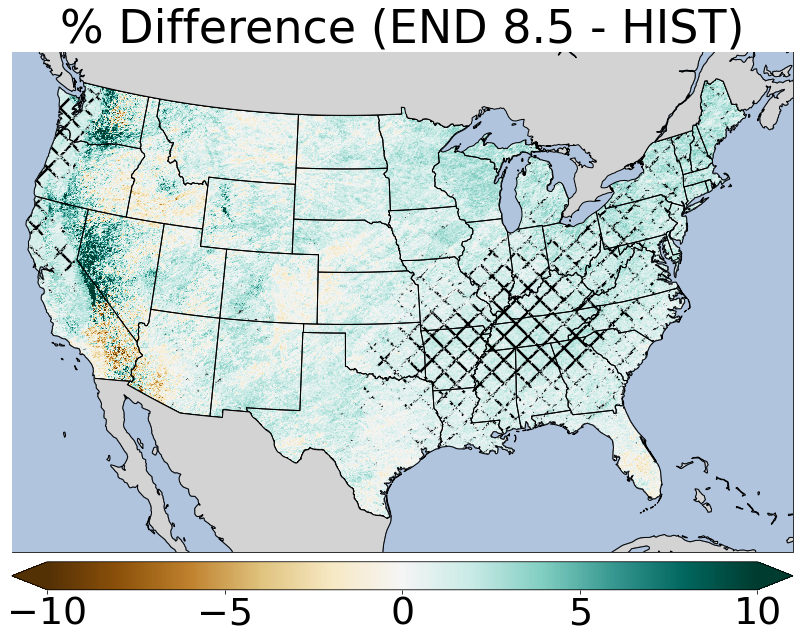

In [24]:
import matplotlib as mpl
fig = plt.figure(figsize= (14,10)) #Plot a figure
gs1 = gridspec.GridSpec(2, 1, height_ratios=[1, .05], bottom=.05, top=.95, wspace=.1)
map_proj = ccrs.LambertConformal(central_longitude = -100, central_latitude = 35) #Set projection, central lat/lon
ax = plt.subplot(projection = map_proj)
#ax.set_title('Maximum diameter hail for 2005', fontsize = 22)
ax.add_feature(cfeature.LAND.with_scale('10m')) #Add land
countries_shp = shpreader.natural_earth(resolution='50m',
                                     category='cultural',
                                     name='admin_0_countries')
for country, info in zip(shpreader.Reader(countries_shp).geometries(), 
                             shpreader.Reader(countries_shp).records()):
        if info.attributes['NAME_LONG'] != 'United States':

            ax.add_geometries([country], ccrs.PlateCarree(),
                             facecolor='lightgrey', edgecolor='k', zorder=6)
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'coastline', '50m', edgecolor='k', 
                                                facecolor='None'), zorder=8) 
ax.add_feature(cfeature.BORDERS.with_scale('10m')) #Add state borders
ax.add_feature(cfeature.STATES.with_scale('10m'), facecolor = 'none') #Add US states
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'ocean', '50m', edgecolor='face', 
                                                facecolor='lightsteelblue'), zorder=6)
lakes_shp = shpreader.natural_earth(resolution='50m',
                                     category='physical',
                                     name='lakes')
for lake, info in zip(shpreader.Reader(lakes_shp).geometries(), 
                             shpreader.Reader(lakes_shp).records()):
        name = info.attributes['name']
        if name == 'Lake Superior' or name == 'Lake Michigan' or \
           name == 'Lake Huron' or name == 'Lake Erie' or name == 'Lake Ontario':
            
            ax.add_geometries([lake], ccrs.PlateCarree(),
                             facecolor='lightsteelblue', edgecolor='k', zorder=6)
ax.set_extent([240,287,22,50]) #Set lat/lon boundaries
lrFig = ax.pcolormesh(lons, lats, end8p5_percent, vmin = -10, vmax = 10, cmap = 'BrBG', transform = ccrs.PlateCarree())
mpl.rcParams['hatch.linewidth'] = 2.5 #This changes the linewidth of the hatches
data = np.ma.masked_equal(utest, 0) #Mask all values from Mann-Whitney array that are equal to 0 (False values)
ax.contourf(lons, lats, data, color = 'none', hatches = 'X', edgecolor = 'b', linewidth = 2, transform=ccrs.PlateCarree(), 
            alpha = 0) #Plot masked array and hatch over True values
plt.title("% Difference (END 8.5 - HIST)", fontsize = 46)
ax1 = plt.subplot(gs1[1, 0])
cb = plt.colorbar(lrFig, cax = ax1, ticks = [-10, -5, 0, 5, 10], orientation = 'horizontal', extend = 'both')
#cb.set_label('Days', fontsize = 30)
cb.ax.tick_params(labelsize = 38)
plt.subplots_adjust(bottom=0.02)
plt.savefig('/home/scratch/jgoodin/wrf_end8p5_mean_annual_hailsize_percentdiff.png')